In [11]:
import os
import pandas as pd
import numpy as np

path= r"C:\Users\Lenovo\Desktop\Cars"
os.chdir(path)
os.listdir(path)

['Cars.xlsx', '~$Cars.xlsx']

In [7]:
car = pd.read_excel("Cars.xlsx")

In [8]:
car.head()

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),16,26,p,compact


In [7]:
#Mat plot lib subplot

fig = plt.figure()

plt.subplot(1,2,1)

plt.hist(car['city'])
plt.xlabel('City Milage')
plt.ylabel

displ    0.444316
year     0.000000
cyl      0.113800
cty      0.796561
hwy      0.369236
dtype: float64

In [10]:
car['cty'].describe()

count    234.000000
mean      16.858974
std        4.255946
min        9.000000
25%       14.000000
50%       17.000000
75%       19.000000
max       35.000000
Name: cty, dtype: float64

In [13]:
IQR=19-14
IQR

5

In [15]:
UL=19+1.5*5
UL

26.5

In [17]:
LL=14-1.5*5
LL

6.5

In [24]:
#Find out the cars in outlier
Outlier = car[(car.cty>UL)] | car[(car.cty<LL)]
Outlier

,manufacturer,model,displ,year,cyl,trans,cty,hwy,fl,class
99,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN
196,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN
212,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN
221,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN
222,NaN,NaN,NaN,True,True,NaN,True,True,NaN,NaN


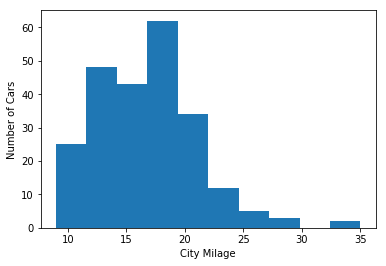

In [5]:
# Lets check if the city milage and highway milage is normally distributed

# Lets first check overall city milage and highway milage

# City milage distribution

from matplotlib import pyplot as plt

plt.hist(car['cty'])

plt.xlabel('City Milage')

plt.ylabel('Number of Cars')

plt.show()

([<matplotlib.axis.XTick at 0x1d91e66ac88>,
 <a list of 2 Text xticklabel objects>)

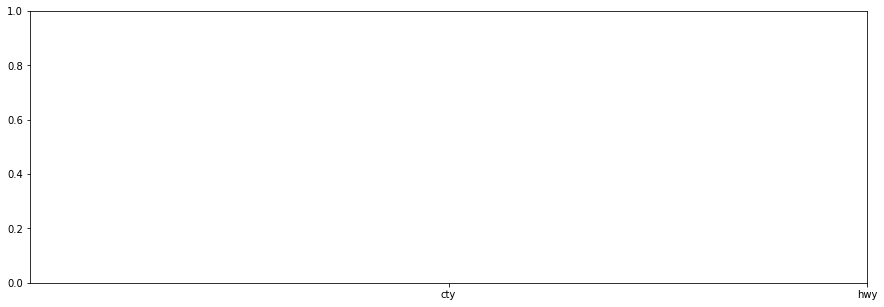

In [31]:
# Or we can also plot this in a form of a box plot

plt.rcParams['figure.figsize'] = [15,5]

# Matplotlib box plot using only one column

data = car[['cty', 'hwy']]

plt.xticks([1,2], ['cty','hwy'])

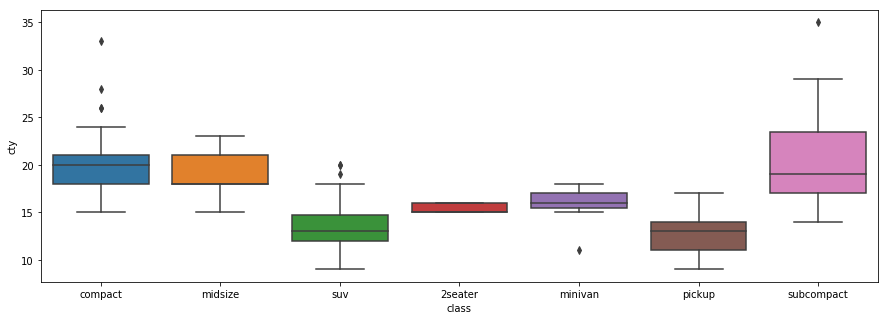

In [10]:
##Creating one box plot for each

import seaborn as sns

sns.boxplot()

sns.boxplot(data=car, x='class', y='cty')

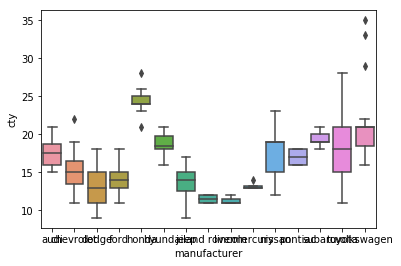

In [14]:
import seaborn as sns

sns.boxplot()

sns.boxplot(data=car, x='manufacturer', y='cty')

<function matplotlib.pyplot.show(*args, **kw)>

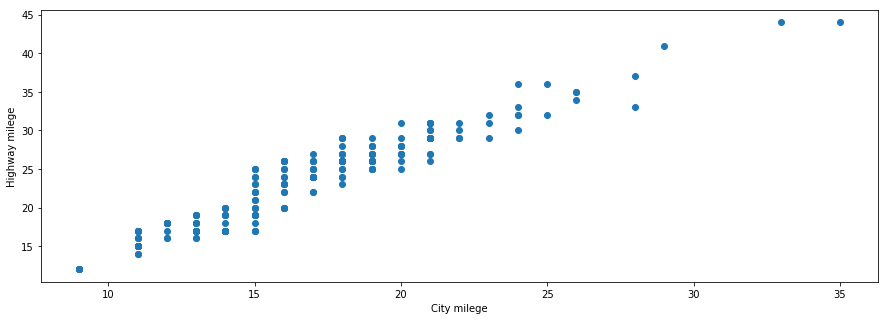

In [16]:
#Scatter plot

plt.scatter(car['cty'],car['hwy'])
plt.xlabel('City milege')
plt.ylabel('Highway milege')
plt.show

In [18]:
##Correlation between city milage anfd highway miega

car_new=car[['cty','hwy']]
car_new.corr()

,cty,hwy
cty,1.000000,0.955916
hwy,0.955916,1.000000


In [24]:
car_new1=car[['cty','hwy','cyl','displ']]
Matrix=car_new1.corr()
Matrix

,cty,hwy,cyl,displ
cty,1.000000,0.955916,-0.805771,-0.798524
hwy,0.955916,1.000000,-0.761912,-0.766020
cyl,-0.805771,-0.761912,1.000000,0.930227
displ,-0.798524,-0.766020,0.930227,1.000000


# Simple Linear Regression 

In [15]:
import os
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# I am defining my X and Y
X=car[['cty']]
Y=car[['hwy']]

#LR object
lm = LinearRegression()

#Fitting the model

model=lm.fit(X,Y)

#Printing the value for intercept

print("Intercept value:",lm.intercept_)
print("Coeficient value:",lm.coef_)

Intercept value: [0.8920411]
Coeficient value: [[1.33745561]]


In [20]:
#Create a validation data set

val_data=pd.DataFrame.from_dict({'cty':[26]})
val_data

pred_highway_milage=model.predict(val_data)
pred_highway_milage

array([[35.66588697]])

In [21]:
#Drinks Data

In [23]:
import os
import pandas as pd
import numpy as np

path= r"C:\Users\Lenovo\Desktop\Cars"
os.chdir(path)
os.listdir(path)
drink = pd.read_excel("Drinks.xlsx")

In [25]:
drink

,Day,Number of Visitors,Drinks sold
0,Monday,32,17
1,Tuesday,45,20
2,Wednesday,39,23
3,Thursday,43,7
4,Friday,58,24
5,Saturday,84,49
6,Sunday,65,38


In [26]:
X=drink[['Number of Visitors']]
Y=drink[['Drinks sold']]
lm = LinearRegression()
model=lm.fit(X,Y)
print("Intercept value:",lm.intercept_)
print("Coeficient value:",lm.coef_)

Intercept value: [-10.19329973]
Coeficient value: [[0.68129262]]


In [30]:
val_data1=pd.DataFrame.from_dict({'Number of Visitors':[50]})
val_data1

pred_drink_sold=model.predict(val_data1)
pred_drink_sold


array([[23.87133116]])

In [32]:
##Agin comig to car data set

#4 Step Proccess
X=car[['cty']]
Y=car[['hwy']]


#Step1: splitting the data into training and test

X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2)
len(X_train),len(X_test),len(Y_train),len(Y_test)

(187, 47, 187, 47)

In [38]:
#Creating the model
lm1=LinearRegression()
#fitting the model

model1=lm1.fit(X_train,Y_train)


#Pred> the result for X_test
Y_test['hwy_Pred']= model1.predict(X_test)
Y_test.head()



C:\Users\Lenovo\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,hwy,hwy_Pred
152,20,19.536159
76,18,16.864326
156,27,23.543907
35,29,24.879823
120,24,22.207991


In [36]:
Y_test['hwy'].mean()

23.51063829787234

In [40]:
Y_test['hwy_Pred'].mean()

23.089126865571217

In [41]:
Y_test.corr()

,hwy,hwy_Pred
hwy,1.000000,0.951578
hwy_Pred,0.951578,1.000000


In [42]:
model1.predict(val_data) ##checking from previous val_data and but this data is accurate because we checking this with accuravy//

array([[35.56715159]])